Assignment Problems
Kamu adalah anggota tim Data Science di Austin Smart City dan sedang mengerjakan projek analisa sistem pembuangan dan pengelolaan sampah di kota tersebut. Sebagai anggota tim, berdasarkan data yang tersedia, coba analisa data tersebut menggunakan statistik deskriptif dan inferensial, serta berikan insight kepada pemerintah kota Austin mengenai kondisi sistem pembuangan dan pengelolaan sampah. Gunakan guideline/langkah berikut untuk mempermudah kamu dalam menganalisa.

Problem 1 (Stats)
Sebelum melakukan perhitungan dan analisa statistik, lakukan pembersihan data terlebih dahulu. Pastikan tidak ada missing value, dsb.

Selanjutnya, lakukan eksplorasi data sederhana guna mengetahui dan mengenali data yang kamu punya. Kamu bisa lakukan hal-hal berikut untuk mengeksplorasi data kamu.

Melihat rentang waktu pengambilan data
Ada apa saja tipe load sampah di kota Austin berdasarkan data
Mengetahui tempat pembuangan sampah ada dimana saja
dsb.
Berdasarkan central tendency (mean, median, dan modus) untuk masing-masing site, insight/informasi apa yang bisa kamu sampaikan kepada pemerintah kota? (Caution: Jangan gunakan pd.DataFrame.describe())

Pilih site yang paling menarik perhatian kamu, dan berikan alasannya.

Gunakan site yang kamu pilih untuk dicek apakah data load_weight ada outlier atau tidak. Gunakan teknik yang tepat sesuai dengan distribusi dari datanya!. Jika iya, berapa persen jumlah outliernya? dan bandingkan central tendency data yang telah dikeluarkan outliernya dengan yang belum (hasil dari perhitungan nomor 3).

Gunakan site yang telah kamu pilih untuk dihitung range, variance, dan standar deviasi untuk data load_weight. Berikan insight dari hasil perhitunganmu kepada pemerintah kota (Pastikan data yang digunakan adalah data yang sudah dibersihkan dari outlier).

Pemerintah kota berencana menambah site baru. Berikan analisa dan saran terkait berapa kapasitas penampungan di site baru berdasarkan perhitungan confidence interval. Data apa yang kamu gunakan, apakah hanya dari satu site saja atau dari keseluruhan site?

Buatlah analisa uji hipotesis dari data tersebut dari data yang tersedia (kasusnya dibebaskan). Definisikan H0 dan H1 nya serta lakukan perhitungan menggunakan t-test yang sesuai dengan hipotesis kamu. Tulis kesimpulan dari hasil perhitunganmu kepada pemerintah kota (Ingat! pemerintah kota tidak mengerti p-value, hipotesis diterima/tidak diterima, jadi gunakan bahasa yang lebih manusiawi!).

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import scipy.stats as stats

In [222]:
#Dataset
df = pd.read_csv("/content/drive/MyDrive/bq-results-20221212-103640-1670841478516/bq-results-20221212-103640-1670841478516.csv")
df

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08 12:00:00 UTC,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00 UTC,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00 UTC,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00 UTC,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00 UTC,TIRES,1400.0,MRF
...,...,...,...,...,...
26152,2021-03-01,2021-03-01 11:26:00 UTC,ORGANICS,12100.0,ORGANICS BY GOSH
26153,2021-03-01,2021-03-01 04:27:00 UTC,ORGANICS,10900.0,ORGANICS BY GOSH
26154,2021-03-01,2021-03-01 05:55:00 UTC,ORGANICS,21800.0,ORGANICS BY GOSH
26155,2021-03-01,2021-03-02 01:10:00 UTC,ORGANICS,5640.0,ORGANICS BY GOSH


In [223]:
df.head()

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08 12:00:00 UTC,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00 UTC,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00 UTC,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00 UTC,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00 UTC,TIRES,1400.0,MRF


In [224]:
df.tail()

,report_date,load_time,load_type,load_weight,dropoff_site
26152,2021-03-01,2021-03-01 11:26:00 UTC,ORGANICS,12100.0,ORGANICS BY GOSH
26153,2021-03-01,2021-03-01 04:27:00 UTC,ORGANICS,10900.0,ORGANICS BY GOSH
26154,2021-03-01,2021-03-01 05:55:00 UTC,ORGANICS,21800.0,ORGANICS BY GOSH
26155,2021-03-01,2021-03-02 01:10:00 UTC,ORGANICS,5640.0,ORGANICS BY GOSH
26156,2021-03-01,2021-03-01 10:22:00 UTC,RECYCLED METAL,360.0,AUSTIN IRON AND METAL


In [225]:
df.info


<bound method DataFrame.info of       report_date                load_time       load_type  load_weight  \
0      2021-07-08  2021-07-08 12:00:00 UTC           TIRES       2260.0   
1      2021-07-08  2021-07-08 11:00:00 UTC           TIRES       1260.0   
2      2021-07-08  2021-07-08 03:00:00 UTC           TIRES        800.0   
3      2021-05-01  2021-05-01 12:29:00 UTC           TIRES        760.0   
4      2021-07-03  2021-07-03 12:09:00 UTC           TIRES       1400.0   
...           ...                      ...             ...          ...   
26152  2021-03-01  2021-03-01 11:26:00 UTC        ORGANICS      12100.0   
26153  2021-03-01  2021-03-01 04:27:00 UTC        ORGANICS      10900.0   
26154  2021-03-01  2021-03-01 05:55:00 UTC        ORGANICS      21800.0   
26155  2021-03-01  2021-03-02 01:10:00 UTC        ORGANICS       5640.0   
26156  2021-03-01  2021-03-01 10:22:00 UTC  RECYCLED METAL        360.0   

                dropoff_site  
0                        MRF  
1    

In [226]:
df.shape

(26157, 5)

In [227]:
print(df.isnull().sum())

report_date        0
load_time          0
load_type          0
load_weight     1048
dropoff_site       0
dtype: int64


In [228]:
updated_df = df.dropna(axis=0)
updated_df

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08 12:00:00 UTC,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00 UTC,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00 UTC,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00 UTC,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00 UTC,TIRES,1400.0,MRF
...,...,...,...,...,...
26152,2021-03-01,2021-03-01 11:26:00 UTC,ORGANICS,12100.0,ORGANICS BY GOSH
26153,2021-03-01,2021-03-01 04:27:00 UTC,ORGANICS,10900.0,ORGANICS BY GOSH
26154,2021-03-01,2021-03-01 05:55:00 UTC,ORGANICS,21800.0,ORGANICS BY GOSH
26155,2021-03-01,2021-03-02 01:10:00 UTC,ORGANICS,5640.0,ORGANICS BY GOSH


In [229]:
print(updated_df.isnull().sum())

report_date     0
load_time       0
load_type       0
load_weight     0
dropoff_site    0
dtype: int64


In [230]:
df['report_date'].unique

<bound method Series.unique of 0        2021-07-08
1        2021-07-08
2        2021-07-08
3        2021-05-01
4        2021-07-03
            ...    
26152    2021-03-01
26153    2021-03-01
26154    2021-03-01
26155    2021-03-01
26156    2021-03-01
Name: report_date, Length: 26157, dtype: object>

3.Berdasarkan central tendency (mean, median, dan modus) untuk masing-masing site, insight/informasi apa yang bisa kamu sampaikan kepada pemerintah kota? (Caution: Jangan gunakan pd.DataFrame.describe())



In [231]:
updated_df.groupby('report_date').sum()

,load_weight
report_date,
2021-01-02,2170130.0
2021-01-04,2920260.0
2021-01-05,2388540.0
2021-01-06,2396550.0
2021-01-07,2438330.0
...,...
2021-07-05,1897290.0
2021-07-06,1921640.0
2021-07-07,1553080.0


In [232]:
df['load_type'].unique

<bound method Series.unique of 0                 TIRES
1                 TIRES
2                 TIRES
3                 TIRES
4                 TIRES
              ...      
26152          ORGANICS
26153          ORGANICS
26154          ORGANICS
26155          ORGANICS
26156    RECYCLED METAL
Name: load_type, Length: 26157, dtype: object>

In [233]:
updated_df.groupby('dropoff_site').sum()

,load_weight
dropoff_site,
AUSTIN IRON AND METAL,2.256000e+04
AUSTIN WOOD RECYCLING,8.100000e+03
BALCONES RECYCLING,3.631587e+07
BALCONES WOODS,8.460000e+03
GREAT NORTHERN,1.149200e+05
HORNSBY BEND,1.095052e+07
MRF,3.023970e+05
ON ROUTE HIGH DUMP,8.768000e+04
ORGANICS BY GOSH,6.784991e+07


In [234]:
updated_df.groupby('dropoff_site').mean()

,load_weight
dropoff_site,
AUSTIN IRON AND METAL,451.200000
AUSTIN WOOD RECYCLING,4050.000000
BALCONES RECYCLING,9464.652072
BALCONES WOODS,8460.000000
GREAT NORTHERN,19153.333333
HORNSBY BEND,6628.644068
MRF,1799.982143
ON ROUTE HIGH DUMP,12525.714286
ORGANICS BY GOSH,11818.482146


In [235]:
updated_df.groupby('dropoff_site').median()

,load_weight
dropoff_site,
AUSTIN IRON AND METAL,400.0
AUSTIN WOOD RECYCLING,4050.0
BALCONES RECYCLING,9840.0
BALCONES WOODS,8460.0
GREAT NORTHERN,21110.0
HORNSBY BEND,6390.0
MRF,1360.0
ON ROUTE HIGH DUMP,14940.0
ORGANICS BY GOSH,11920.0


In [236]:
updated_df.groupby('load_type').sum()

,load_weight
load_type,
BRUSH,9.439680e+06
BULK,1.294074e+07
CONTAMINATED ORGANICS,2.538000e+04
CONTAMINATED RECYCLING,5.160000e+03
DEAD ANIMAL,2.465000e+04
GARBAGE COLLECTIONS,1.451478e+08
LITTER,1.286800e+05
MIXED LITTER,1.051780e+06
ORGANICS,6.793037e+07


In [237]:
df.describe()

,load_weight
count,25109.000000
mean,12227.136307
std,7135.059565
min,0.000000
25%,7060.000000
50%,11300.000000
75%,16380.000000
max,245540.000000


In [ ]:
df["dropoff_site"].value_counts()

In [239]:
df["load_type"].value_counts()

GARBAGE COLLECTIONS          8242
RECYCLING - SINGLE STREAM    6760
ORGANICS                     5763
BULK                         1594
BRUSH                        1517
SWEEPING                     1390
MIXED LITTER                  329
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

In [240]:
MRF_dropsite = df[ 
    (df["dropoff_site"] == "MRF")
]
MRF_dropsite

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08 12:00:00 UTC,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00 UTC,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00 UTC,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00 UTC,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00 UTC,TIRES,1400.0,MRF
...,...,...,...,...,...
25414,2021-02-25,2021-02-25 02:33:00 UTC,TIRES,700.0,MRF
25415,2021-02-25,2021-02-25 04:35:00 UTC,TIRES,580.0,MRF
25416,2021-02-25,2021-02-25 02:35:00 UTC,TIRES,2060.0,MRF
25691,2021-02-26,2021-02-26 02:06:00 UTC,TIRES,1180.0,MRF


In [241]:
MRF_dropsite.groupby('load_type').sum()

,load_weight
load_type,
BULK,27500.0
RECYCLED METAL,230.0
TIRES,274667.0


In [243]:
MRF_dropsite.groupby('load_type').sum()

,load_weight
load_type,
BULK,27500.0
RECYCLED METAL,230.0
TIRES,274667.0


In [279]:
MRF_dropsite[(MRF_dropsite["load_type"] == "BULK")
]

,report_date,load_time,load_type,load_weight,dropoff_site
9321,2021-04-23,2021-04-23 11:12:00 UTC,BULK,12420.0,MRF
21334,2021-01-19,2021-01-19 08:43:00 UTC,BULK,15080.0,MRF


In [244]:
MRF_dropsite[
  (MRF_dropsite["load_type"] == "RECYCLED METAL")
]

,report_date,load_time,load_type,load_weight,dropoff_site
16129,2021-06-15,2021-06-15 09:46:00 UTC,RECYCLED METAL,230.0,MRF


In [ ]:
MRF_dropsite[
  (MRF_dropsite["load_type"] == "TIRES")
]

In [ ]:
MRF_dropsite.value_counts()

In [ ]:
MRF_dropsite["load_type"].value_counts()

4. Saya memilih dropoff_site = MRF karena MRF memiliki spesialisasi dalam pengolahan sampah Tires, Bulk dan Recycled Metal

5. Gunakan site yang kamu pilih untuk dicek apakah data load_weight ada outlier atau tidak. Gunakan teknik yang tepat sesuai dengan distribusi dari datanya!. Jika iya, berapa persen jumlah outliernya? dan bandingkan central tendency data yang telah dikeluarkan outliernya dengan yang belum (hasil dari perhitungan nomor 3)

In [ ]:
print (MRF_dropsite['load_weight'].median())
print (MRF_dropsite['load_weight'].mean())
print (MRF_dropsite['load_weight'].mode())

In [250]:
#Diketahui bahwa central tendency sebelum dan sesudah outliers dikeluarkan adalah sama.

In [251]:
def print_skewness(MRF_dropsite):
    print (f'\'{MRF_dropsite}\' skewness: {MRF_dropsite.skew()}')
    # print(f'\'{data.name}\'kurtosis: {data.kurt()}')
    if MRF_dropsite.skew() > 0.5:
        print ('right skewed')
    elif MRF_dropsite.skew() < -0.5:
        print( "Left Skewed")
    else:
        print("Normal Distribution")

In [252]:
def print_skewness(MRF_dropsite):
    print_skewness(MRF_dropsite)
    plt.hist(MRF_dropsite, bins=25, rwidth=1, density=True)
    plt.xlabel(f'{MRF_dropsite}')
    plt.ylabel('load weight')
    rng = np.arange(MRF_dropsitemin(), MRF_dropsite.max(), 0.1)
    plt.plot(rng, norm.pdf(rng,MRF_dropsitemean(),MRF_dropsite.std()))

In [ ]:
MRF_dropsite["load_weight"].skew()

# **Distribusi Data Skew Kanan (negative) karena skew > 0,05**

6.Gunakan site yang telah kamu pilih untuk dihitung range, variance, dan standar deviasi untuk data load_weight. Berikan insight dari hasil perhitunganmu kepada pemerintah kota (Pastikan data yang digunakan adalah data yang sudah dibersihkan dari outlier).

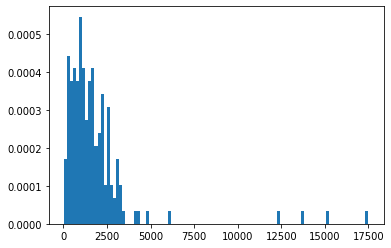

In [254]:
plt.hist(MRF_dropsite["load_weight"], bins=100, density=True)
[mean_fit, std_fit] = scipy.stats.norm.fit(MRF_dropsite["load_weight"])

In [255]:
#Varian
MRF_dropsite['load_weight'].var()

5135635.718242087

In [256]:
#standard Deviasi
MRF_dropsite.load_weight.std()

2266.1941042730846

In [257]:
#range
Range_A = MRF_dropsite.load_weight.max() - MRF_dropsite.load_weight.min()
Range_A

17460.0

In [258]:
#outlier
Q1 = MRF_dropsite.load_weight.quantile(0.25)
Q3 = MRF_dropsite.load_weight.quantile(0.75)
Q1, Q3

(740.0, 2180.0)

In [259]:
IQR = Q3 - Q1
IQR

1440.0

In [260]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-1420.0, 4340.0)

lower limit dianggap 0 karena lower limit bernilai negatif.

In [ ]:
#Persentase outlier= (7/168) * 100 = 4%
MRF_dropsite[(MRF_dropsite.load_weight>0) | (MRF_dropsite.load_weight<lower_limit)] 

In [262]:
#data tanpa outlier
MRF_dropsite_no_outlier = MRF_dropsite[~(MRF_dropsite.load_weight>upper_limit) & ~(MRF_dropsite.load_weight<0)] 
MRF_dropsite_no_outlier

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08 12:00:00 UTC,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00 UTC,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00 UTC,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00 UTC,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00 UTC,TIRES,1400.0,MRF
...,...,...,...,...,...
25414,2021-02-25,2021-02-25 02:33:00 UTC,TIRES,700.0,MRF
25415,2021-02-25,2021-02-25 04:35:00 UTC,TIRES,580.0,MRF
25416,2021-02-25,2021-02-25 02:35:00 UTC,TIRES,2060.0,MRF
25691,2021-02-26,2021-02-26 02:06:00 UTC,TIRES,1180.0,MRF


In [263]:
print(MRF_dropsite_no_outlier.load_weight.mean()),
print(MRF_dropsite_no_outlier.load_weight.sum()),
print(MRF_dropsite_no_outlier.load_weight.median())

1419.0496894409937
228467.0
1320.0


In [264]:
A = MRF_dropsite_no_outlier.load_weight

In [265]:
A_mean = A.mean()
A_mean

1419.0496894409937

In [266]:
#range
A_range = MRF_dropsite_no_outlier.load_weight.max() - MRF_dropsite_no_outlier.load_weight.min()
A_range

4080.0

In [267]:
A.var()

760243.9975155279

In [268]:
A.std()

871.9197196505696

In [269]:
Q1_A = A.quantile(0.25)
Q3_A = A.quantile(0.75)
Q1_A, Q3_A

(720.0, 2020.0)

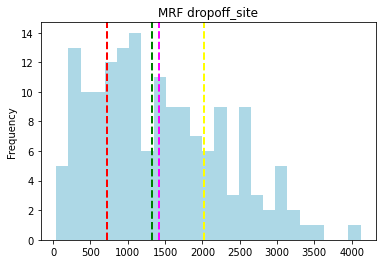

In [270]:
A.plot.hist(title='MRF dropoff_site', color='lightblue', bins=25)  
plt.axvline(A.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(A.median(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(Q1_A, color='red', linestyle='dashed', linewidth=2)
plt.axvline(Q3_A, color='yellow', linestyle='dashed', linewidth=2)

plt.show()

In [271]:
MRF_dropsite_no_outlier.corr()

,load_weight
load_weight,1.0


In [ ]:
MRF_dropsite_no_outlier['Z-Score'] = stats.zscore(MRF_dropsite_no_outlier['load_weight'])
MRF_dropsite_no_outlier

Pemerintah kota berencana menambah site baru. Berikan analisa dan saran terkait berapa kapasitas penampungan di site baru berdasarkan perhitungan confidence interval. Data apa yang kamu gunakan, apakah hanya dari satu site saja atau dari keseluruhan site?

In [273]:
stats.t.interval(alpha=0.90, df=len(A)-1,
              loc=np.mean(A),
              scale=stats.sem(A))

(1305.3621884568115, 1532.7371904251759)

In [274]:
stats.t.interval(alpha=0.99, df=len(A)-1,
              loc=np.mean(A),
              scale=stats.sem(A))

(1239.9112019249064, 1598.188176957081)

In the case of example 1, the calculated confident mean interval of the population with 90% is (1305-1532), and in example 2 when calculated the confident mean interval of the population with 99% is (1239-1598), it can be interpreted that the example 2 confident interval is wider than the example 1 confident interval with the 95% of the population, which means that there are 99% chances the confidence interval of [2.34, 5.45] contains the true population mean.

Berdasarkan hal tersebut kapasitas yang disarankan dalam pembangunan tempat penampungan sampah baru diatas kapasitas harian MRF yaitu 1419 load_weight per hari

8.Buatlah analisa uji hipotesis dari data tersebut dari data yang tersedia (kasusnya dibebaskan). Definisikan H0 dan H1 nya serta lakukan perhitungan menggunakan t-test yang sesuai dengan hipotesis kamu. Tulis kesimpulan dari hasil perhitunganmu kepada pemerintah kota (Ingat! pemerintah kota tidak mengerti p-value, hipotesis diterima/tidak diterima, jadi gunakan bahasa yang lebih manusiawi!).

H0: μ = 1419.0 load Weight per hari

H1: μ != 1419.0 load Weight per hari

In [275]:
t_stat,p_val = stats.ttest_1samp(A, 1419)
print('P-value:',p_val/2) #The p-value divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 0.49971197379909105
t-statistics: 0.0007231036422053656


Karena P-Value > 0.05, H0 ditolak, maka pemerintah kota jika akan membangun penampungan baru harus diatas 1419 load_weight per hari

# **Problem 2**


1.Untuk menghitung turunan pertama dapat digunakan metode simbolik dan numerik, untuk kasus ini, teknik apa yang kamu gunakan?

2.Apakah kamu membutuhkan fungsi matematis untuk menghitung turunannya? (ya/tidak) berikan alasanmu!

3.Berapa load weight yang kamu perkirakan di hari esok (10 Juli 2021)?

1.Numerikal

2.Tidak

In [276]:
#Dataset
Austin_city = pd.read_csv("/content/drive/MyDrive/bq-results-20221211-013155-1670723359976/h8dsft_P0GC2_Tri Galih S.csv.csv")
Austin_city.head()

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-18,2021-01-18 11:06:00 UTC,TIRES,1620.0,MRF
1,2021-01-18,2021-01-18 02:18:00 UTC,TIRES,320.0,MRF
2,2021-01-19,2021-01-19 08:43:00 UTC,BULK,15080.0,MRF
3,2021-01-19,2021-01-19 03:28:00 UTC,TIRES,360.0,MRF
4,2021-01-19,2021-01-19 10:25:00 UTC,TIRES,1560.0,MRF


In [ ]:
df_predict = Austin_city.groupby(Austin_city["report_date"])["load_weight"].sum()
df_predict = df_predict.to_frame().reset_index()
df_predict.columns = ["report_date", "load_weight"]
df_predict.sort_values("report_date", ascending=True)

In [284]:
x = df_predict.index.values
y = df_predict.load_weight.values

v = np.gradient(y,x)

w = df_predict.load_weight[124] + v+1
w[124]


4721.0

3. Load pada 10 Juli diperkirakan sebanyak 4721.0

# **KESIMPULAN**

Berdasarkan analisa dari kedua problem di atas, dapat ditarik kesimpulan bahwa jika pemerintah berencana membuat site baru harus di atas kapasitas site MRF. Namun, untuk optimasi dropoff_site sebaiknya dilakukan secara merata setiap hari.   